In [149]:
base_url = "..//dataset//"

# Loading Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import seaborn as sns
import scipy.stats as stat
import pylab 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

# Agenda

1. Handling missing values

2. Handle Temporal Variables

3. Handle Categorical Variables: remove rare variables

4. Transformations

5. Standardize the values of the variables to same range

# Loading the data

In [151]:
df = pd.read_csv(base_url+'phishing_dataset.csv')

In [152]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


# Create Train and Test Data (Using stratified Shuffle Split)

<AxesSubplot:>

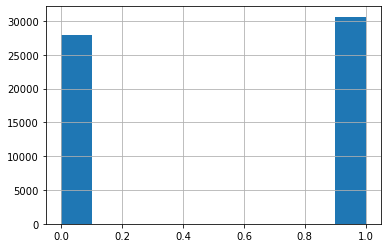

In [153]:
df['phishing'].hist()

In [154]:
df['phishing'].value_counts(normalize=True)

1    0.522585
0    0.477415
Name: phishing, dtype: float64

In [155]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [156]:
for train_index,test_index in split.split(df, df['phishing']):
    print(train_index,test_index)

[22135 36179 22803 ... 52842 17305 27527] [ 8833 54083 54281 ... 29986  7862 44559]


In [157]:
for train_index,test_index in split.split(df, df['phishing']):
    X_train = df.loc[train_index]
    X_test = df.loc[test_index]

<AxesSubplot:>

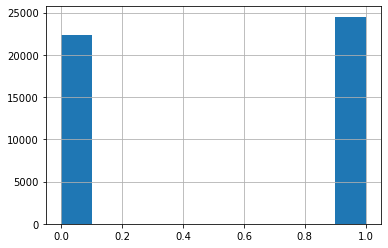

In [158]:
X_train['phishing'].hist()

In [159]:
X_train['phishing'].value_counts(normalize=True)

1    0.522594
0    0.477406
Name: phishing, dtype: float64

In [160]:
X_test['phishing'].value_counts(normalize=True)

1    0.522551
0    0.477449
Name: phishing, dtype: float64

#### Same distribution mantained in train and test set

In [161]:
X_train, y_train = X_train.drop(['phishing'],axis = 1),X_train['phishing']

In [162]:
X_test, y_test = X_test.drop(['phishing'],axis = 1),X_test['phishing']

# Missing Values

## Categorical features

##### There are no categorical features

## Numerical features

In [163]:
df.isnull().sum().sum()

0

In [164]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
discrete_features = [feature for feature in df.columns if len(df[feature].unique())<=25]
continuous_features = list(set(numerical_features) - set(discrete_features))

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


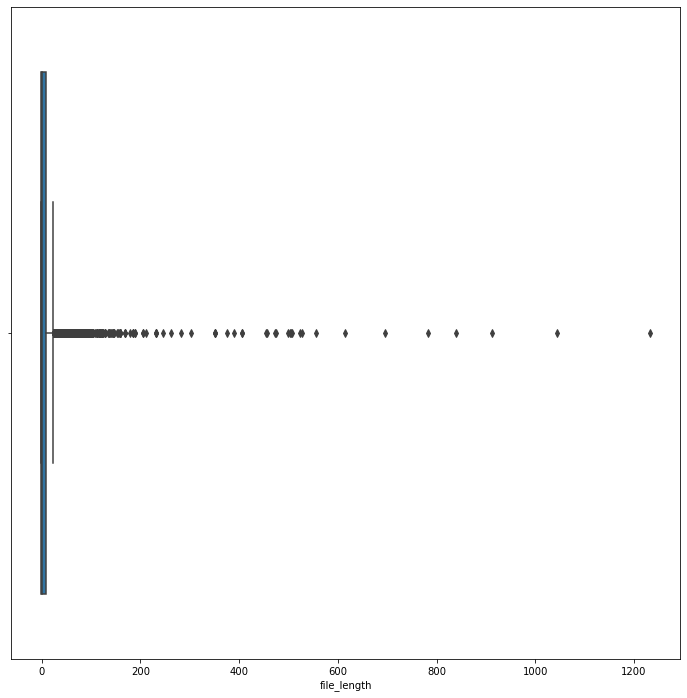

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


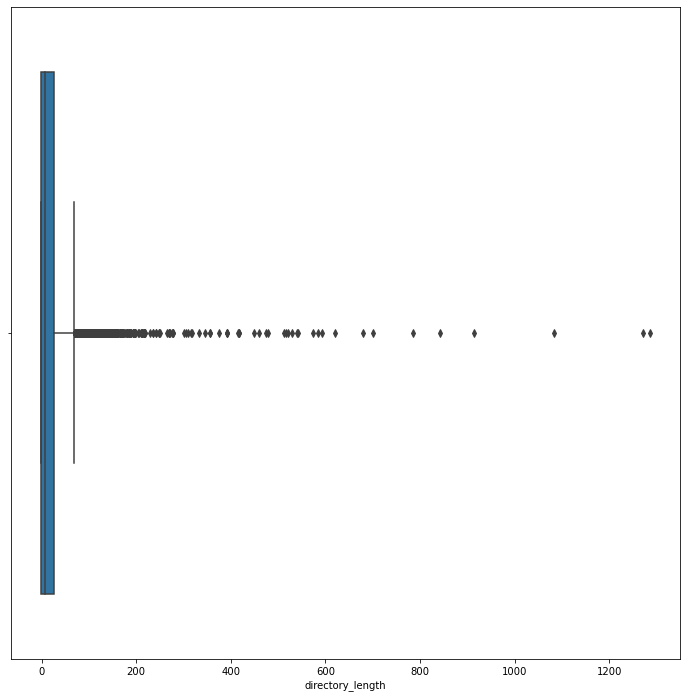

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


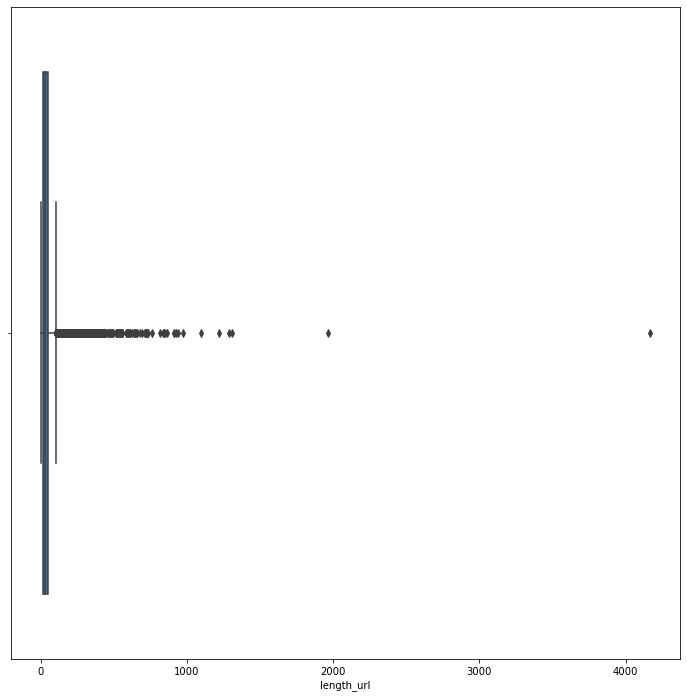

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


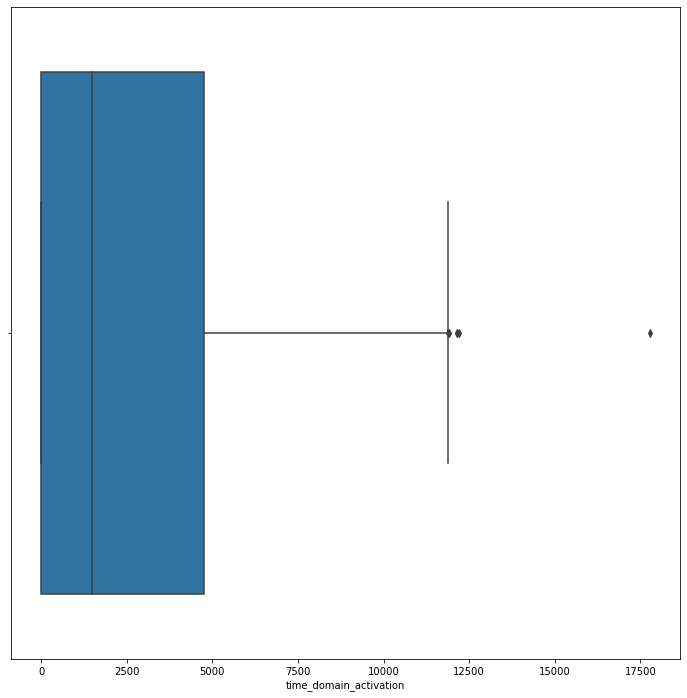

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


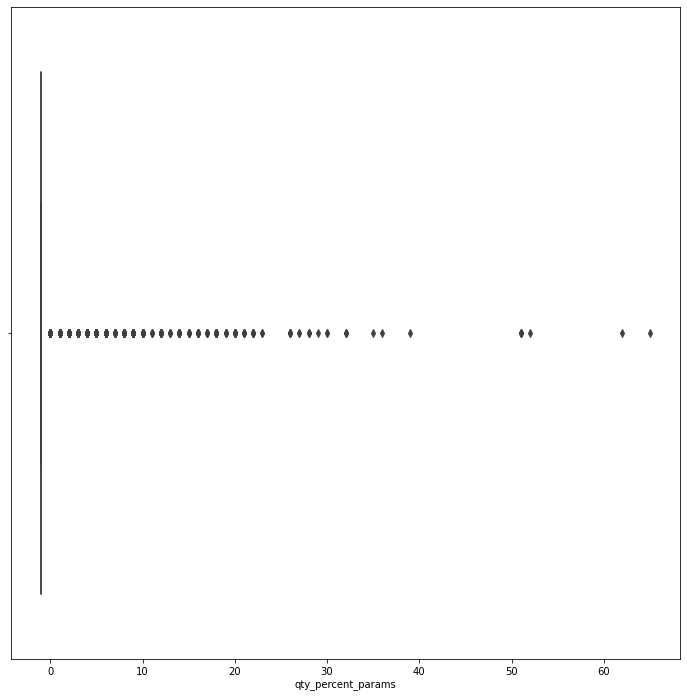

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


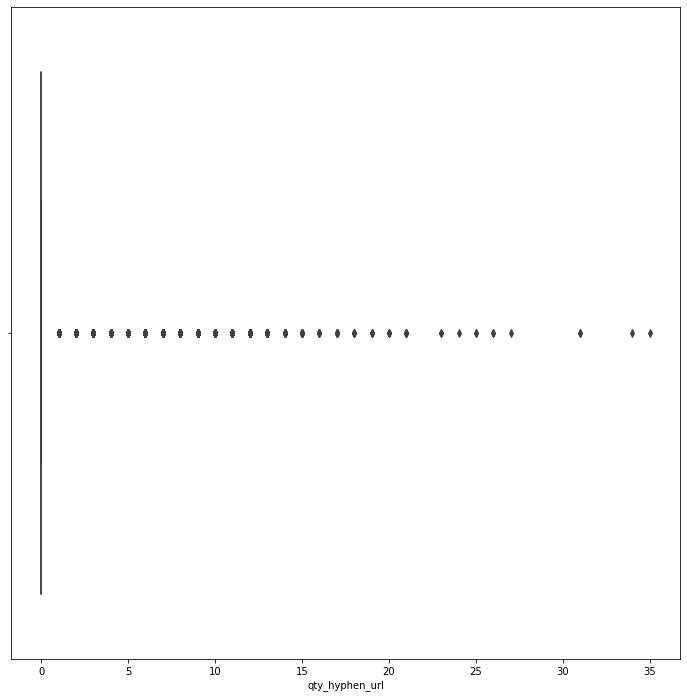

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


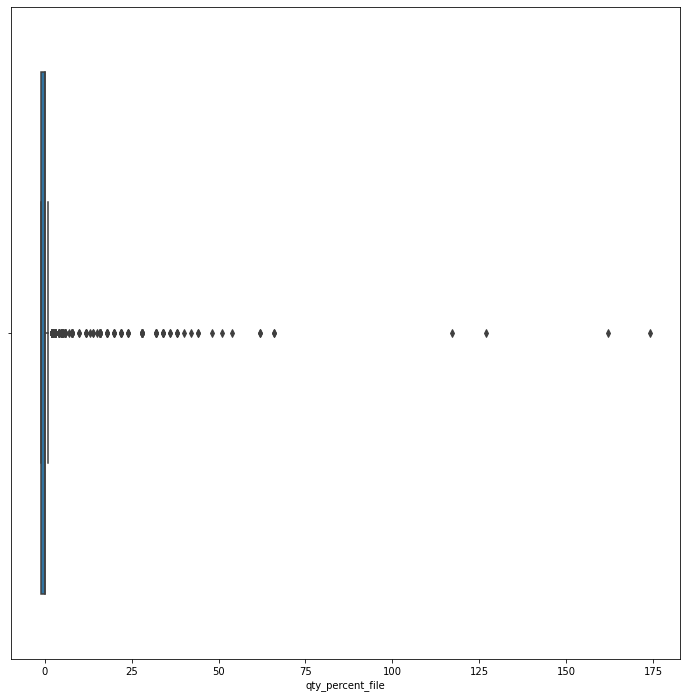

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


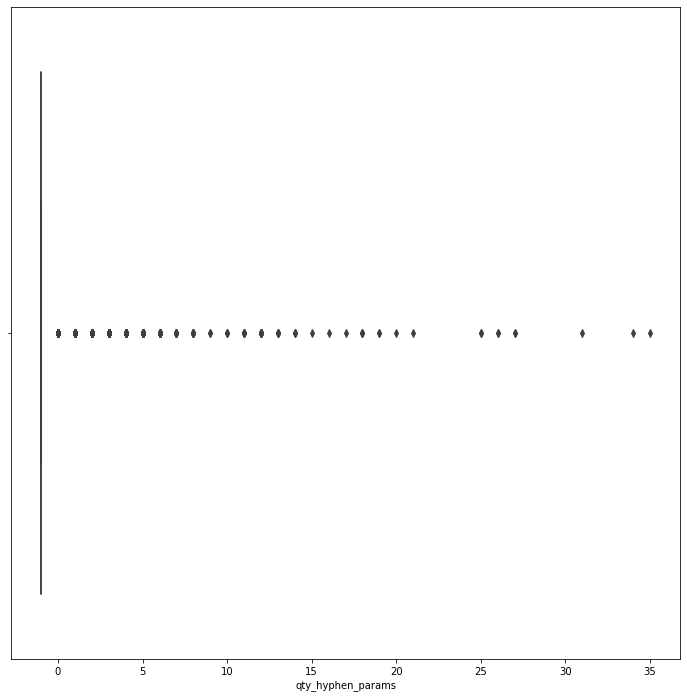

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


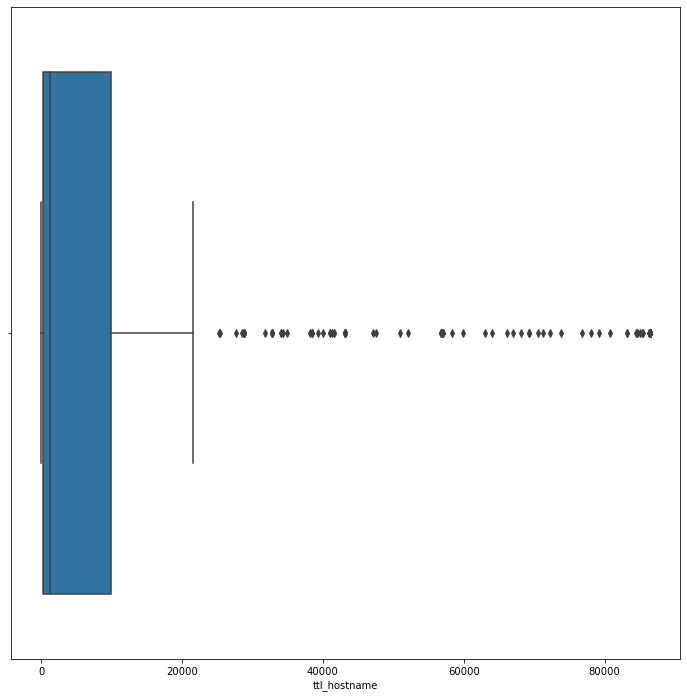

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


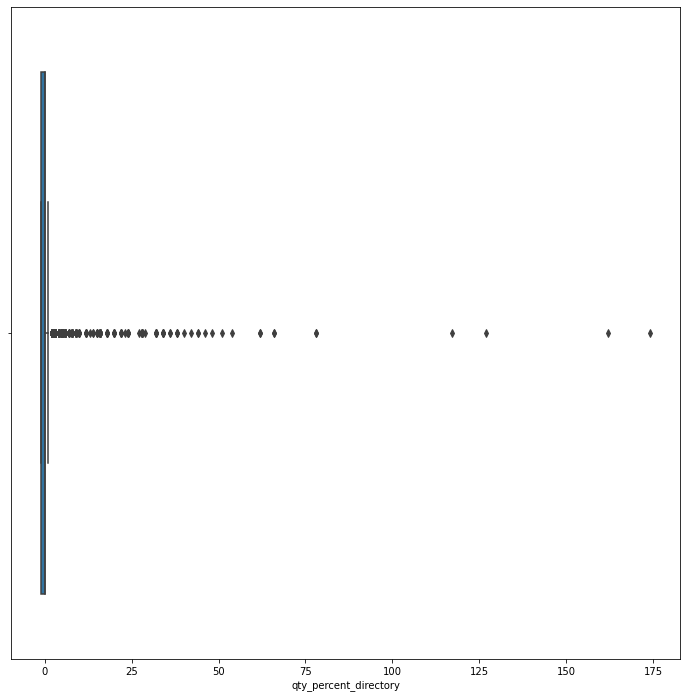

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


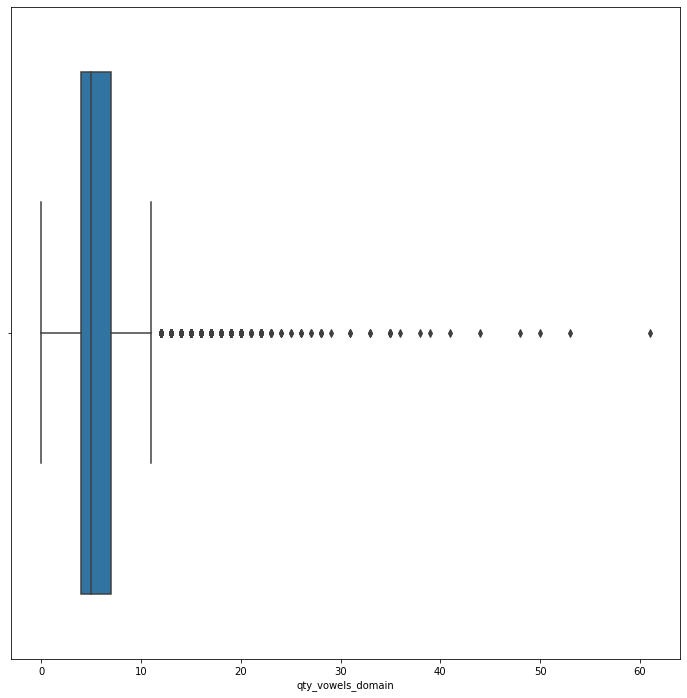

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


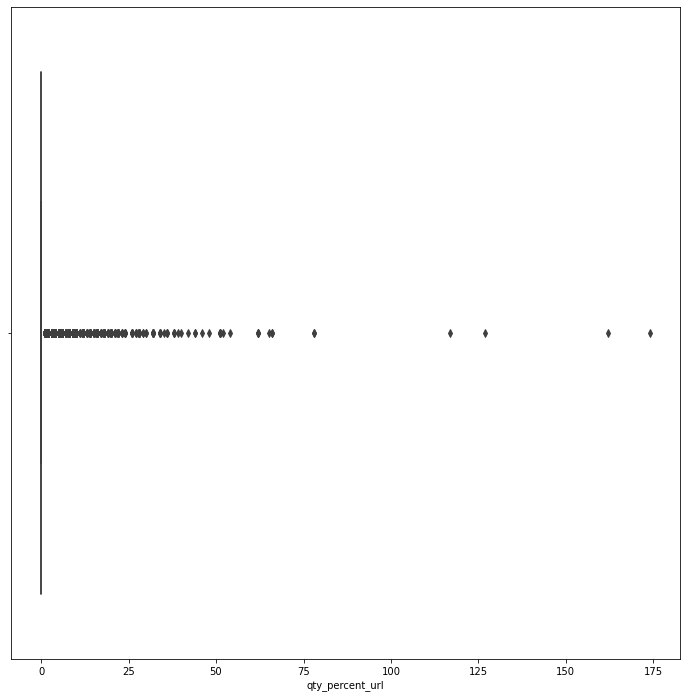

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


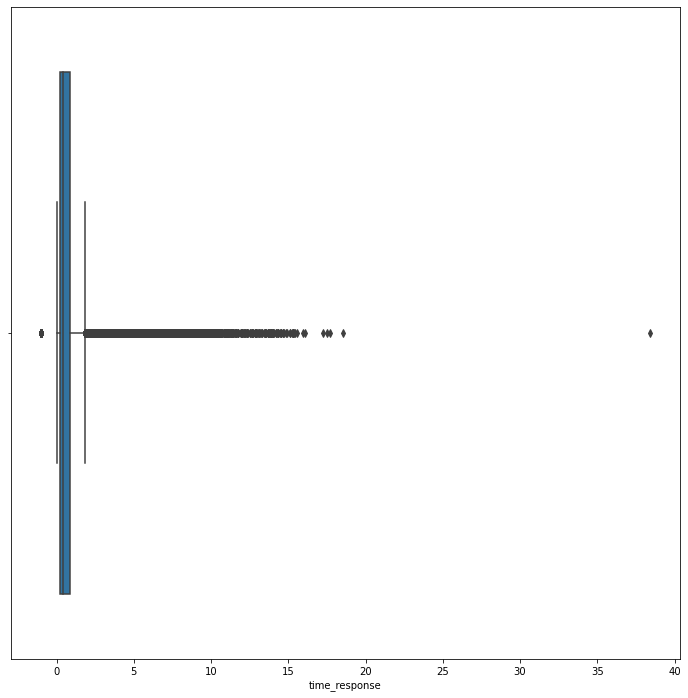

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


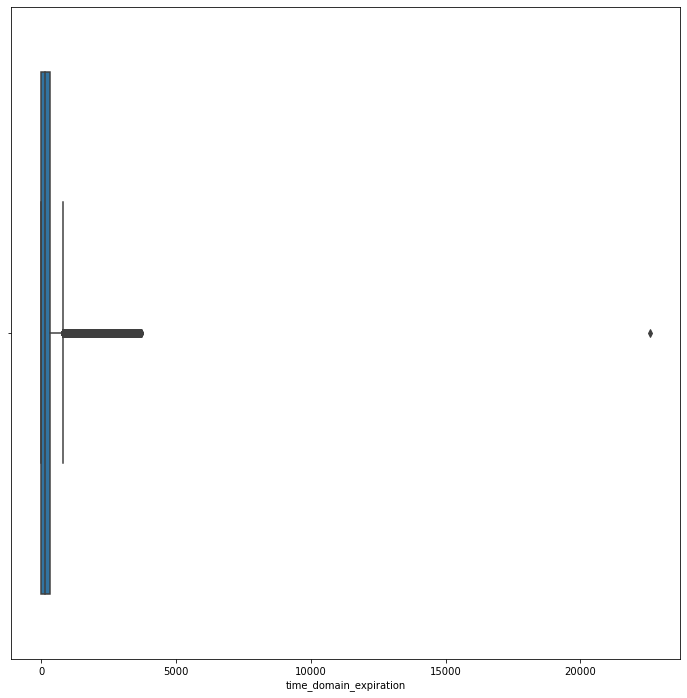

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


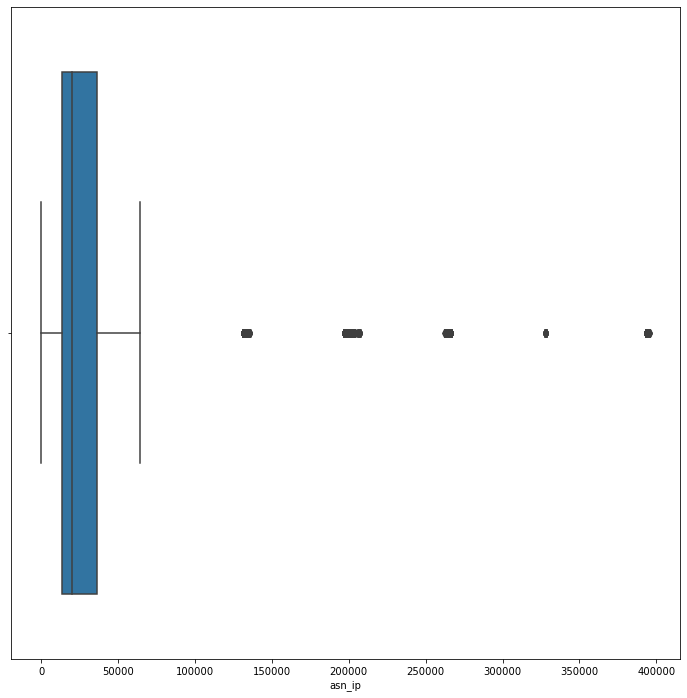

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


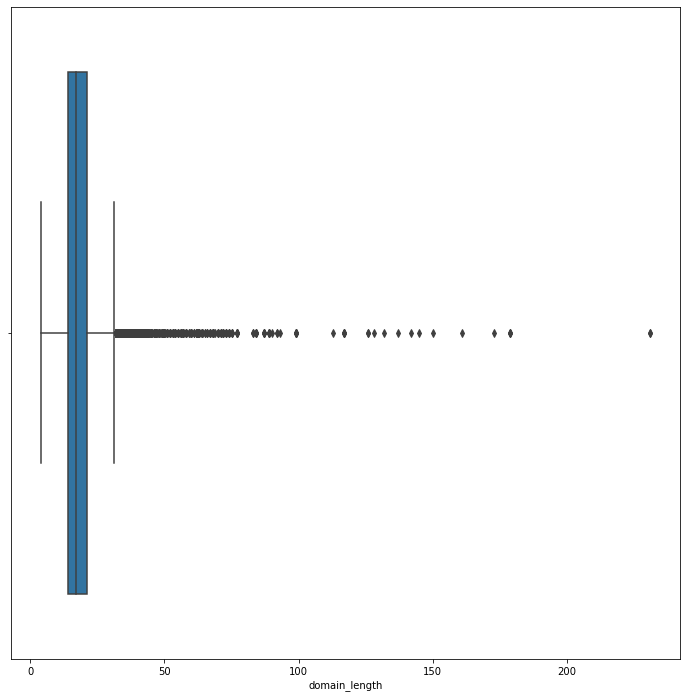

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


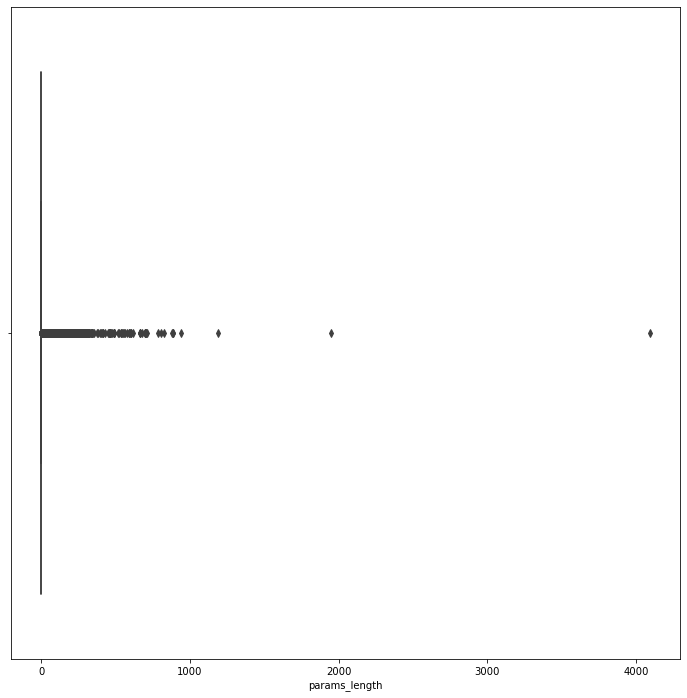

In [165]:
for feature in continuous_features:
    plt.figure(figsize=(12,12))
    sns.boxplot(df[feature])
    plt.show()

#### There are no missing values. As missing values are so less, we can go with median/ mode/ mean imputation. As there are 0 missing values, we will not get the problem of distortion of distribution.

#### Can also go by imputing 0, signifying the character was absent

impute = SimpleImputer()

# Final Preprocessing Pipeline 1:

Use Simple Imputer with median as strategy. There are outliers present

# Temporal Features

There are no temporal features

# Feature Scaling

In [166]:
sc = StandardScaler()

In [167]:
X_train = sc.fit_transform(X_train)

In [168]:
X_train.shape

(46916, 111)

In [169]:
X_test = sc.transform(X_test)

In [170]:
cols = df.drop(['phishing'],axis=1).columns

In [171]:
X_train = pd.DataFrame(X_train, columns=cols)

In [172]:
X_test = pd.DataFrame(X_test, columns=cols)

In [173]:
X_train

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,-0.864480,-0.342657,-0.213654,0.028968,-0.10222,-0.268881,-0.109911,-0.189918,-0.041841,-0.016878,-0.048982,-0.035272,-0.029288,-0.0172,-0.008662,-0.022812,-0.075526,-0.224092,-0.502053,-1.006609,-0.284031,-0.015751,0.0,0.0,0.0,-0.004617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.530215,-0.698543,-0.059589,-0.058314,-0.02339,0.027175,0.298202,0.178983,0.651838,0.593732,0.573744,0.577725,0.637990,0.636378,0.622636,0.643606,0.632052,0.497627,0.651838,0.628712,0.113428,-0.457604,0.061441,0.245906,0.428021,0.651838,0.651838,0.638709,0.649883,0.641374,0.644270,0.644112,0.648369,0.644809,0.635792,0.540259,0.651838,0.651838,0.129826,-0.282366,-0.239972,-0.243055,-0.259845,-0.254556,-0.360479,-0.307098,-0.355781,-0.258668,-0.37545,-0.381987,-0.381987,-0.371144,-0.373027,-0.381987,-0.382096,-0.379689,-0.16321,-0.218986,-0.357516,-0.319883,-0.171271,0.203074,1.739018,0.265866,-0.563528,-0.287940,-0.121602,-0.600062,-0.367924,0.353075,0.997020,-0.370127,-0.034232,-0.048042,-0.091674
1,-0.864480,-0.342657,-0.213654,-0.950176,-0.10222,-0.268881,-0.109911,-0.189918,-0.041841,-0.016878,-0.048982,-0.035272,-0.029288,-0.0172,-0.008662,-0.022812,-0.075526,-0.224092,-0.537689,-1.006609,-0.284031,-0.015751,0.0,0.0,0.0,-0.004617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202475,-0.423778,-0.059589,-0.058314,-1.09502,-0.783331,-1.121860,-1.141257,-1.534125,-1.476542,-1.377667,-1.401864,-1.518334,-1.506779,-1.499682,-1.523269,-1.497146,-1.202539,-1.534125,-1.492890,-0.409477,-0.634616,-1.254807,-0.911259,-1.217697,-1.534125,-1.534125,-1.521135,-1.532489,-1.525450,-1.527491,-1.520583,-1.529854,-1.524405,-1.502628,-1.284828,-1.534125,-1.534125,-0.415760,-0.343412,-0.239972,-0.243055,-0.259845,-0.254556,-0.360479,-0.307098,-0.355781,-0.258668,-0.37545,-0.381987,-0.381987,-0.371144,-0.373027,-0.381987,-0.382096,-0.379689,-0.16321,-0.218986,-0.357516,-0.319883,-0.171271,-1.124098,0.049725,-0.661258,0.917990,-0.525198,-2.307451,0.846848,-0.949082,-0.714788,-1.002989,-1.600370,-0.034232,-0.048042,-0.091674
2,-0.194422,-0.342657,-0.213654,-0.460604,-0.10222,-0.268881,-0.109911,-0.189918,-0.041

# Final Preprocessing Pipeline 2:

Use Standard Scaler for feature scaling